In [186]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA, FastICA
from sklearn.ensemble import RandomForestClassifier
import datetime
import os
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.random_projection import SparseRandomProjection

import get_data
#os.chdir(os.path.dirname(os.path.abspath(__file__)))
print(os.getcwd())
os.chdir(r'C:\Users\AREHAN2\Documents\omscs\CS7641\unsupervised_learning\src')
os.getcwd()

C:\Users\AREHAN2\Documents\omscs\CS7641\unsupervised_learning\src


'C:\\Users\\AREHAN2\\Documents\\omscs\\CS7641\\unsupervised_learning\\src'

In [154]:
x1, y1 = get_data.get_dataset1(False)
x2, y2 = get_data.get_dataset2(False)

x1 = StandardScaler().fit_transform(x1)
x2 = StandardScaler().fit_transform(x2)

print(x1.shape)
print(x2.shape)

count     4898
unique       2
top       True
freq      3258
Name: quality, dtype: object
(4898, 11)
(768, 8)


In [155]:
data = []
cluster_algo = 'KMeans'
for d, x in {'wine': x1, 'pima': x2}.items():

    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        t1 = datetime.datetime.now()
        kmeans.fit(x)
        tdelta = datetime.datetime.now() - t1
        data.append([cluster_algo, d, k, kmeans.score(x), kmeans.inertia_, silhouette_score(x, kmeans.predict(x)), kmeans.n_iter_, tdelta.total_seconds()])



In [156]:
df_kmeans = pd.DataFrame(data, columns=["Algo", "Data", "k", "score", "Inertia", "silhouette score", "#Iterations", "Time"])
df_kmeans=df_kmeans.set_index('k')

In [157]:
df_kmeans[df_kmeans['Data']=='wine']

,Algo,Data,score,Inertia,silhouette score,#Iterations,Time
k,,,,,,,
2,KMeans,wine,-42548.672998,42548.672998,0.214477,7,0.116694
3,KMeans,wine,-39063.297278,39063.297278,0.144421,30,0.297222
4,KMeans,wine,-35986.897359,35986.897359,0.158984,28,0.319167
5,KMeans,wine,-33699.271612,33699.271612,0.143718,36,0.368040
6,KMeans,wine,-31971.857174,31971.857174,0.145511,41,0.474761
7,KMeans,wine,-30553.118854,30553.118854,0.125765,35,0.471765
8,KMeans,wine,-29359.711505,29359.711505,0.128669,42,0.564527
9,KMeans,wine,-28198.371091,28198.371091,0.127880,88,0.723112
10,KMeans,wine,-27441.852740,27441.852740,0.118560,41,0.763008


In [158]:
data = []
cluster_algo = 'GMM'
for d, x in {'wine': x1, 'pima': x2}.items():

    for k in range(2, 11):
        gmm = GaussianMixture(n_components=k, random_state=42)
        t1 = datetime.datetime.now()
        gmm.fit(x)
        tdelta = datetime.datetime.now() - t1
        data.append([cluster_algo, d, k, gmm.score(x), gmm.lower_bound_, gmm.aic(x), gmm.bic(x), silhouette_score(x, gmm.predict(x)), gmm.n_iter_, tdelta.total_seconds()])


In [159]:
df_gmm = pd.DataFrame(data, columns=["Algo", "Data", "k", "score", "Lower Bound", "AIC", "BIC", "silhouette score", "#Iterations", "Time"])
df_gmm = df_gmm.set_index('k')

In [160]:
df_gmm

,Algo,Data,score,Lower Bound,AIC,BIC,silhouette score,#Iterations,Time
k,,,,,,,,,
2,GMM,wine,-11.972962,-11.973385,117597.132377,118604.102624,0.248648,20,0.155597
3,GMM,wine,-11.508246,-11.508807,113200.779158,114714.482819,0.082354,40,0.328082
4,GMM,wine,-11.294630,-11.295047,111264.192561,113284.629637,0.038204,42,0.381006
5,GMM,wine,-11.123699,-11.124061,109745.756730,112272.927220,0.027544,44,0.465787
6,GMM,wine,-10.895159,-10.896173,107662.981143,110696.885048,0.044180,44,0.431868
7,GMM,wine,-10.780374,-10.781182,106694.541422,110235.178741,0.042298,30,0.362056
8,GMM,wine,-10.742339,-10.742809,106477.955294,110525.326028,0.033701,26,0.337119
9,GMM,wine,-10.669864,-10.670643,105923.989730,110478.093878,0.031445,28,0.449826
10,GMM,wine,-10.564067,-10.564787,105043.600902,110104.438465,0.012679,33,0.818866


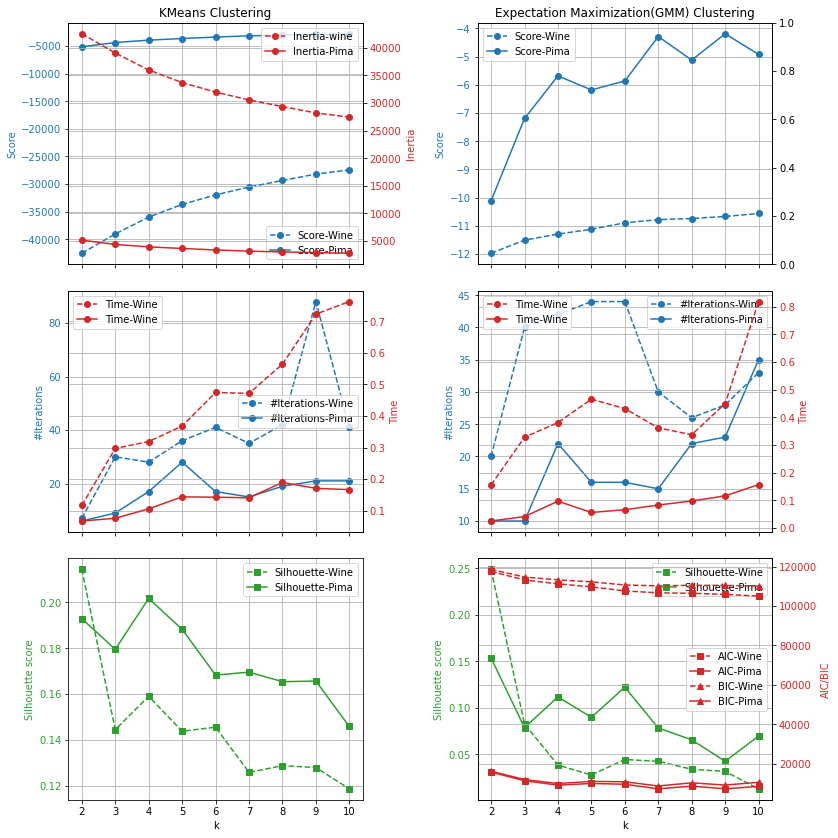

In [161]:
fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot(321)
ax1_rev = ax1.twinx()
ax1.set_title('KMeans Clustering')

color="tab:blue"
df_kmeans[df_kmeans['Data']=='wine']['score'].plot(linestyle='dashed', marker='o', ax=ax1, color=color, label='Score-Wine')
df_kmeans[df_kmeans['Data']=='pima']['score'].plot(linestyle='solid', marker='o', ax=ax1, color=color, label='Score-Pima')
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
ax1.set_xlabel('k')
ax1.legend()

color="tab:red"
df_kmeans[df_kmeans['Data']=='wine']['Inertia'].plot(linestyle='dashed', marker='o', ax=ax1_rev, color=color, label='Inertia-wine')
df_kmeans[df_kmeans['Data']=='pima']['Inertia'].plot(linestyle='solid', marker='o', ax=ax1_rev, color=color, label='Inertia-Pima')
ax1_rev.ticklabel_format(useOffset=False, style='plain')
ax1_rev.set_ylabel('Inertia', color=color)  # we already handled the x-label with ax1
ax1_rev.tick_params(axis='y', labelcolor=color)
ax1_rev.grid()
ax1_rev.legend()


ax322 = plt.subplot(322)
ax322_rev = ax322.twinx()
ax322.set_title('Expectation Maximization(GMM) Clustering')

color="tab:blue"
df_gmm[df_gmm['Data']=='wine']['score'].plot(linestyle='dashed', marker='o', ax=ax322, color=color, label='Score-Wine')
df_gmm[df_kmeans['Data']=='pima']['score'].plot(linestyle='solid', marker='o', ax=ax322, color=color, label='Score-Pima')
ax322.ticklabel_format(useOffset=False, style='plain')
ax322.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ax322.tick_params(axis='y', labelcolor=color)
ax322.grid()
ax322.set_xlabel('k')
ax322.legend()




ax2 = plt.subplot(323)
ax2_rev = ax2.twinx()

color="tab:blue"
df_kmeans[df_kmeans['Data']=='wine']['#Iterations'].plot(linestyle='dashed', marker='o', ax=ax2, color=color, label='#Iterations-Wine')
df_kmeans[df_kmeans['Data']=='pima']['#Iterations'].plot(linestyle='solid', marker='o', ax=ax2, color=color, label='#Iterations-Pima')
ax2.ticklabel_format(useOffset=False, style='plain')
ax2.set_ylabel('#Iterations', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()
ax2.set_xlabel('k')
ax2.legend(loc='center right')


color="tab:red"
df_kmeans[df_kmeans['Data']=='wine']['Time'].plot(linestyle='dashed', marker='o', ax=ax2_rev, color=color, label='Time-Wine')
df_kmeans[df_kmeans['Data']=='pima']['Time'].plot(linestyle='solid', marker='o', ax=ax2_rev, color=color, label='Time-Wine')
ax2_rev.ticklabel_format(useOffset=False, style='plain')
ax2_rev.set_ylabel('Time', color=color)  # we already handled the x-label with ax1
ax2_rev.tick_params(axis='y', labelcolor=color)
ax2_rev.grid()
ax2_rev.legend()



ax324 = plt.subplot(324)
ax324_rev = ax324.twinx()

color="tab:blue"
df_gmm[df_gmm['Data']=='wine']['#Iterations'].plot(linestyle='dashed', marker='o', ax=ax324, color=color, label='#Iterations-Wine')
df_gmm[df_gmm['Data']=='pima']['#Iterations'].plot(linestyle='solid', marker='o', ax=ax324, color=color, label='#Iterations-Pima')
ax324.ticklabel_format(useOffset=False, style='plain')
ax324.set_ylabel('#Iterations', color=color)  # we already handled the x-label with ax1
ax324.tick_params(axis='y', labelcolor=color)
ax324.grid()
ax324.set_xlabel('k')
ax324.legend()


color="tab:red"
df_gmm[df_gmm['Data']=='wine']['Time'].plot(linestyle='dashed', marker='o', ax=ax324_rev, color=color, label='Time-Wine')
df_gmm[df_gmm['Data']=='pima']['Time'].plot(linestyle='solid', marker='o', ax=ax324_rev, color=color, label='Time-Wine')
ax324_rev.ticklabel_format(useOffset=False, style='plain')
ax324_rev.set_ylabel('Time', color=color)  # we already handled the x-label with ax1
ax324_rev.tick_params(axis='y', labelcolor=color)
ax324_rev.grid()
ax324_rev.legend()


ax3 = plt.subplot(325)
color="tab:green"
df_kmeans[df_kmeans['Data']=='wine']['silhouette score'].plot(linestyle='dashed', marker='s', ax=ax3, color=color, label='Silhouette-Wine')
df_kmeans[df_kmeans['Data']=='pima']['silhouette score'].plot(linestyle='solid', marker='s', ax=ax3, color=color, label='Silhouette-Pima')
ax3.ticklabel_format(useOffset=False, style='plain')
ax3.set_ylabel('Silhouette score', color=color)  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor=color)
ax3.grid()
ax3.legend()


ax326 = plt.subplot(326)
ax326_rev = ax326.twinx()
color="tab:green"
df_gmm[df_gmm['Data']=='wine']['silhouette score'].plot(linestyle='dashed', marker='s', ax=ax326, color=color, label='Silhouette-Wine')
df_gmm[df_gmm['Data']=='pima']['silhouette score'].plot(linestyle='solid', marker='s', ax=ax326, color=color, label='Silhouette-Pima')
ax326.ticklabel_format(useOffset=False, style='plain')
ax326.set_xlabel('k')
ax326.set_ylabel('Silhouette score', color=color)  # we already handled the x-label with ax1
ax326.tick_params(axis='y', labelcolor=color)
ax326.grid()
ax326.legend()

color="tab:red"
df_gmm[df_gmm['Data']=='wine']['AIC'].plot(linestyle='dashed', marker='s', ax=ax326_rev, color=color, label='AIC-Wine')
df_gmm[df_gmm['Data']=='pima']['AIC'].plot(linestyle='solid', marker='s', ax=ax326_rev, color=color, label='AIC-Pima')
df_gmm[df_gmm['Data']=='wine']['BIC'].plot(linestyle='dashed', marker='^', ax=ax326_rev, color=color, label='BIC-Wine')
df_gmm[df_gmm['Data']=='pima']['BIC'].plot(linestyle='solid', marker='^', ax=ax326_rev, color=color, label='BIC-Pima')
ax326_rev.ticklabel_format(useOffset=False, style='plain')
ax326_rev.set_ylabel('AIC/BIC', color=color)  # we already handled the x-label with ax1
ax326_rev.tick_params(axis='y', labelcolor=color)
ax326_rev.grid()
ax326_rev.legend()

plt.tight_layout(pad=2.0)
#plt.suptitle('Clustering Wine and Pima Data', size=15)

plot_dir = r'../../plot/step1/kmeans'
os.makedirs(plot_dir, exist_ok=True)
plt.savefig(plot_dir+'/step1_cluster.png')

# Step 2: Dimensionality Reduction

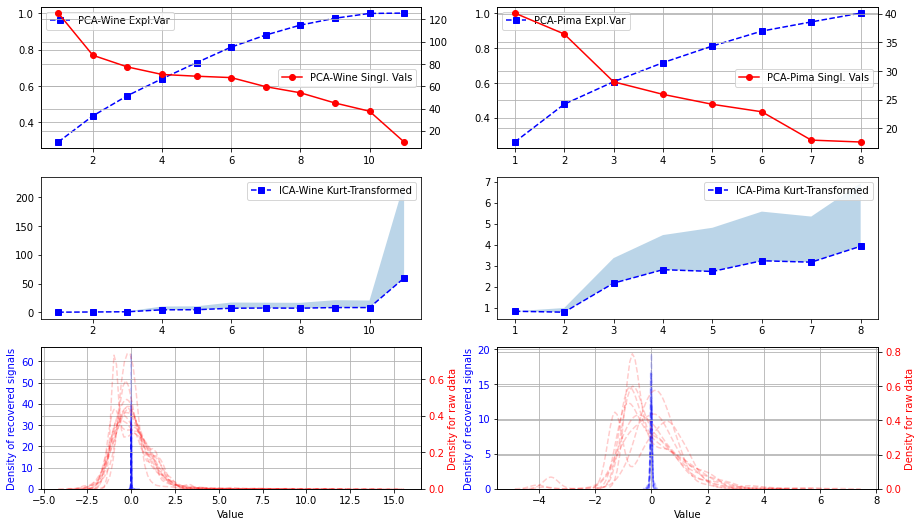

In [442]:
fig = plt.figure(figsize=(15,12))

data = []
cluster_algo = 'KMeans'
for i, (d, x) in enumerate({'Wine': x1, 'Pima': x2}.items()):
    ax = plt.subplot(421+i)
    pca = PCA(whiten=True, random_state=42)
    pca.fit(x)
    ax.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 'bs--', label='PCA-'+d+' Expl.Var')
    ax_rev = ax.twinx()
    ax_rev.plot(np.arange(1, len(pca.singular_values_)+1), pca.singular_values_, 'ro-', label='PCA-'+d+' Singl. Vals')
    #print('PCA-'+d+'Avg Log Likelihood=', pca.score(x))
    ax.legend()
    ax_rev.legend(loc='center right')
    ax.grid()
    ax_rev.grid()
    ax = plt.subplot(422+i)
    
    kurt_values = []
    
    #print(x.shape)
    
    for n in range(1, x.shape[1]+1):
        ica = FastICA(n_components=n, whiten=True, random_state=42)
        ica.fit(x)
        x_ica = ica.transform(x)
        kurt_mean = np.mean(np.abs((kurtosis(x_ica, axis=0, fisher=True))))
        kurt_std = np.std(np.abs((kurtosis(x_ica, axis=0, fisher=True))))
    
        #print('n=', n, 'kurt=', np.mean(kurtosis(x_ica, axis=0, fisher=True),axis=0))
        
        kurt_values.append([kurt_mean, kurt_std])
    
    kurt_values = np.array(kurt_values)
    #print(kurt_values)
    
    kurt_before_transform = kurtosis(x, axis=0, fisher=True)
    kurt_values = np.absolute(np.array(kurt_values))
    kurt_values_mean = np.mean(kurt_values, axis=0)
    kurt_values_std = np.std(kurt_values, axis=0)
    ax = plt.subplot(423+i)
    ax.plot(range(1,x_ica.shape[1]+1), kurt_values[:,0], 'bs--', label='ICA-'+d+' Kurt-Transformed')
    ax.fill_between(range(1,x_ica.shape[1]+1), kurt_values[:,0]+kurt_values[:,1], kurt_values[:,0], alpha=0.3)
    #ax.plot(range(1,x.shape[1]+1), kurt_before_transform, 'ro--', label='ICA-'+d+' Kurt-Original')
    #print('ICA-'+d+'=', pca.score(x))
    ax.legend()
    
    ax = plt.subplot(425+i)
    ax_rev = ax.twinx()
    
    for i in range(x_ica.shape[1]):
        sns.kdeplot(x_ica[:, i], color='b',  linestyle='dashed', 
                    ax=ax, 
                   alpha=0.2)
        xi = x[:,i] if type(x)==np.ndarray else x[x.columns[i]]
        sns.kdeplot(xi, color='r', linestyle='dashed', 
                    ax=ax_rev, 
                    alpha=0.2)
    
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_ylabel('Density of recovered signals', color='b')  # we already handled the x-label with ax1
    ax.tick_params(axis='y', labelcolor='b')
    ax.grid()
    ax.set_xlabel('Value')
    #ax.legend()

    ax_rev.ticklabel_format(useOffset=False, style='plain')
    ax_rev.set_ylabel('Density for raw data', color='r')  # we already handled the x-label with ax1
    ax_rev.tick_params(axis='y', labelcolor='r')
    ax_rev.grid()
    ax_rev.set_xlabel('Value')
    #ax_rev.legend()

    
    
    #print(kurt_values)
    #data.append([pca.score(x)])



In [145]:
x1, y1 = get_data.get_dataset1(False)
x2, y2 = get_data.get_dataset2(False)

data = []
for i, (d, x) in enumerate({'Wine': x1, 'Pima': x2}.items()):   
    
    for s in [42, 1, 360, 2020, 1000]:
        for n in range(1, x1.shape[1]+10):
            random_projection = SparseRandomProjection(random_state=s, n_components=n)
            # data has this shape:  row, col = 4898, 11 

            random_projection.fit(x)
            components =  random_projection.components_.toarray() # shape=(5, 11) 
            p_inverse = np.linalg.pinv(components.T) # shape=(5, 11) 

            #now get the transformed data using the projection components
            reduced_data = random_projection.transform(x)
            reconstructed= reduced_data.dot(p_inverse) 

            #print(reduced_data.shape) #(4898, 5)
            #print(reconstructed.shape) #(4898, 11), back in original shape

            assert  x.shape ==  reconstructed.shape
            error = mean_squared_error(x, reconstructed)
            
            data.append([d, s, n, error])
            



count     4898
unique       2
top       True
freq      3258
Name: quality, dtype: object


In [146]:
data = pd.DataFrame(data, columns=['data', 'seed', '#Projections', 'Reconstruction Error'])
data

,data,seed,#Projections,Reconstruction Error
0,Wine,42,1,2.059990e+03
1,Wine,42,2,2.057483e+03
2,Wine,42,3,2.046825e+03
3,Wine,42,4,2.057938e+03
4,Wine,42,5,2.054682e+03
5,Wine,42,6,2.054682e+03
6,Wine,42,7,2.044860e+03
7,Wine,42,8,2.049370e+03
8,Wine,42,9,1.941388e+03
9,Wine,42,10,1.908965e+03


In [147]:
recons_error_mean = data.groupby(by=['data', '#Projections'])['Reconstruction Error'].mean().reset_index()
print(recons_error_mean)

    data  #Projections  Reconstruction Error
0   Pima             1          4.809499e+03
1   Pima             2          4.958705e+03
2   Pima             3          4.259905e+03
3   Pima             4          2.971515e+03
4   Pima             5          2.152233e+03
5   Pima             6          2.134718e+03
6   Pima             7          1.175699e+03
7   Pima             8          1.406810e+03
8   Pima             9          5.852963e+02
9   Pima            10          3.909101e+02
10  Pima            11          1.710646e-26
11  Pima            12          2.469390e-26
12  Pima            13          1.051133e+02
13  Pima            14          5.957186e-27
14  Pima            15          9.257611e-27
15  Pima            16          6.130292e-27
16  Pima            17          2.684547e-26
17  Pima            18          1.866335e-26
18  Pima            19          6.940384e-27
19  Pima            20          4.927641e-27
20  Wine             1          2.057497e+03
21  Wine  

In [148]:
recons_error_std = data.groupby(by=['data', '#Projections']).std()['Reconstruction Error'].reset_index()
print(recons_error_std)

    data  #Projections  Reconstruction Error
0   Pima             1          4.394988e+02
1   Pima             2          3.223479e+02
2   Pima             3          1.150002e+03
3   Pima             4          1.348375e+03
4   Pima             5          9.636666e+02
5   Pima             6          8.782316e+02
6   Pima             7          9.640091e+02
7   Pima             8          1.191667e+03
8   Pima             9          1.052506e+03
9   Pima            10          8.741016e+02
10  Pima            11          2.468654e-26
11  Pima            12          4.316817e-26
12  Pima            13          2.350405e+02
13  Pima            14          2.054099e-27
14  Pima            15          4.200016e-27
15  Pima            16          3.013416e-27
16  Pima            17          4.680523e-26
17  Pima            18          2.977025e-26
18  Pima            19          3.042721e-27
19  Pima            20          2.026951e-27
20  Wine             1          1.078332e+01
21  Wine  

'C:\\Users\\AREHAN2\\Documents\\omscs\\CS7641\\unsupervised_learning\\src'

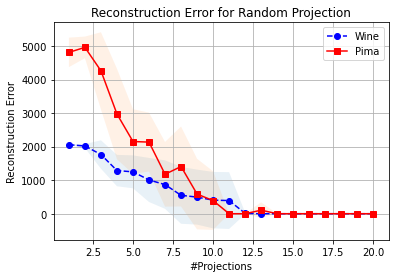

In [218]:
figure = fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot(111)
d = recons_error_mean[recons_error_mean['data']=='Wine']
ax1.plot(d["#Projections"], d['Reconstruction Error'], 'bo--', label='Wine')
ax1.fill_between(d["#Projections"], d['Reconstruction Error']-recons_error_std[recons_error_std['data']=='Wine']['Reconstruction Error'],
                d['Reconstruction Error']+recons_error_std[recons_error_std['data']=='Wine']['Reconstruction Error'], alpha=0.1)


d = recons_error_mean[recons_error_mean['data']=='Pima']
ax1.plot(d["#Projections"], d['Reconstruction Error'], 'rs-', label='Pima')
ax1.fill_between(d["#Projections"], d['Reconstruction Error']-recons_error_std[recons_error_std['data']=='Pima']['Reconstruction Error'],
                d['Reconstruction Error']+recons_error_std[recons_error_std['data']=='Pima']['Reconstruction Error'], alpha=0.1)
ax1.grid()
ax1.set_ylabel('Reconstruction Error')
ax1.set_xlabel('#Projections')
ax1.set_title('Reconstruction Error for Random Projection')
ax1.legend()
plot_dir = os.path.join(os.pardir, r'plot\step2\RP')
os.makedirs(plot_dir, exist_ok=True)
plt.savefig(plot_dir+'/step2_random_proj_recons_error.png')
os.getcwd()

'C:\\Users\\AREHAN2\\Documents\\omscs\\CS7641\\unsupervised_learning\\src\\..\\..\\plot/step2/RP'

# RFC

count     4898
unique       2
top       True
freq      3258
Name: quality, dtype: object
['alcohol', 'density', 'volatile acidity', 'chlorides', 'total sulfur dioxide', 'citric acid']
['Glucose', 'BMI', 'Age', 'Pregnancies', 'Insulin']


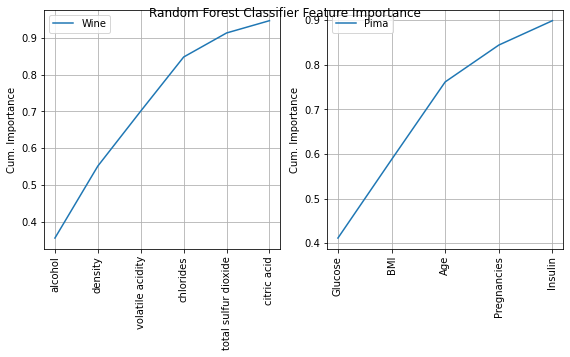

In [238]:
x1, y1 = get_data.get_dataset1(False)
x2, y2 = get_data.get_dataset2(False)

figure = fig = plt.figure(figsize=(8,5))

for i, (d, (x, y)) in enumerate({'Wine': (x1,y1), 'Pima': (x2,y2)}.items()):  
    rfc = RFC(n_estimators=500, min_samples_leaf=round(0.1*x.shape[0]), n_jobs=-1, random_state=5)
    feat_imp = rfc.fit(x,y).feature_importances_ 
    feat_imp = pd.DataFrame(feat_imp,columns=['Feature Importance'], index=x.columns)
    
    feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
    feat_imp['Cum Sum Importance'] = feat_imp['Feature Importance'].cumsum()
    feat_imp = feat_imp[feat_imp['Cum Sum Importance'] <= 0.95]
    top_cols = feat_imp.index.tolist()
    print(top_cols)
    ax = plt.subplot(121+i)
    ax.plot(feat_imp['Cum Sum Importance'], label=d)
    plt.xticks(rotation=90)
    ax.set_ylabel('Cum. Importance')
    ax.legend()
    ax.grid()

plt.suptitle('Random Forest Classifier Feature Importance')
plt.tight_layout(pad=1.0)
plot_dir = os.path.join(os.pardir, 'plot', 'step2', 'RFC')
os.makedirs(plot_dir, exist_ok=True)
plt.savefig(os.path.join(plot_dir, 'step2_rfc_feature_importance.png'))


'C:\\Users\\AREHAN2\\Documents\\omscs\\CS7641\\unsupervised_learning\\src'

<Figure size 432x288 with 0 Axes>